In [36]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots

In [37]:
n = 50
p = 0.2
eta = 0.3

compGraph = generateGraphMUN(n, p, eta);
comparison_graph = generateGraphERO(n, p, eta)
B = magneticIncidence(compGraph);

L = B*B';
levScores = real(diag(B'*((B*B')\B)));

In [38]:
rng = Random.default_rng()
q = 0.0
crsf = multi_type_spanning_forest(rng, compGraph, q)

{50, 50} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [47]:
t = 3
sparseL = zeros(n,n);
w_tot = 0;
for i = 1:t
    crsf = multi_type_spanning_forest(rng, compGraph, q)
    D = props(crsf);
    w = D[:weight];
    w_tot += w;
    print(w, " ")
    sparseB = magneticIncidence(crsf);
    ind_e = mtsf_edge_indices(crsf, compGraph);
    # with leverage scores
    W = diagm(1 ./ levScores[ind_e])
    sparseL = sparseL + w*sparseB*W*sparseB';
end
sparseL = sparseL/w_tot;

1.0 

1.0 1.0 

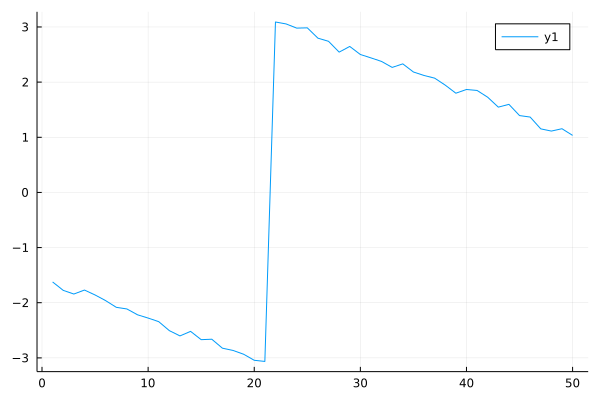

In [48]:
lam,v = eigs(sparseL, nev=1, which=:SM);
score = angular_score(v);
plot(score)

In [49]:
[real(eigvals(L)) real(eigvals(sparseL))]

50×2 Matrix{Float64}:
  0.0564181   0.0367721
  3.56184     1.65486
  3.81674     1.90792
  4.35527     2.42547
  4.50986     2.78048
  4.82004     2.94212
  4.92996     3.20208
  5.21185     3.6874
  5.44262     3.78271
  5.65818     3.92479
  ⋮          
 14.1288     16.4258
 14.379      17.5047
 14.7186     17.7036
 14.7795     18.9419
 15.2104     19.7149
 16.048      21.3054
 16.5651     22.323
 17.0297     22.6852
 18.4738     25.3589

In [50]:
[cond(L) cond(inv(sparseL)*L)]

1×2 Matrix{Float64}:
 327.445  85.6204

In [29]:
connected_components(crsf)

1-element Vector{Vector{Int64}}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

In [30]:
length(cycle_basis(crsf.graph))

1

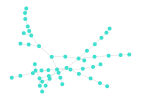

In [31]:
gplot(crsf)

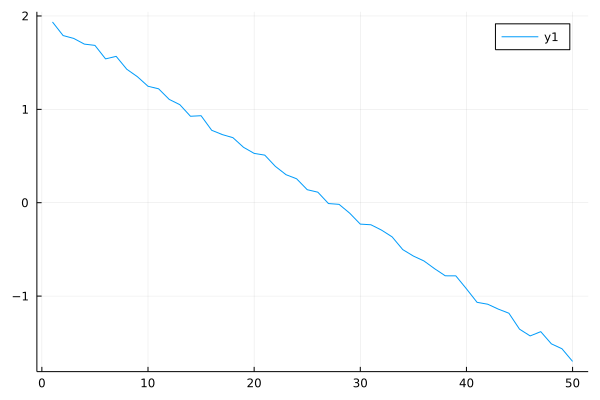

In [32]:
lam,v = eigs(L, nev=1, which=:SM);
score = angular_score(v);

plot(score)